<a href="https://colab.research.google.com/github/yyyaoyuan/KAN--/blob/main/dataFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. 一个简单的线性拟合例子**

<ipython-input-25-4c52618152d8>:11: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  p = polyfit(x, y, 1)


Slope (m): 1.9752629427622472
Intercept (b): 1.0300120825796628


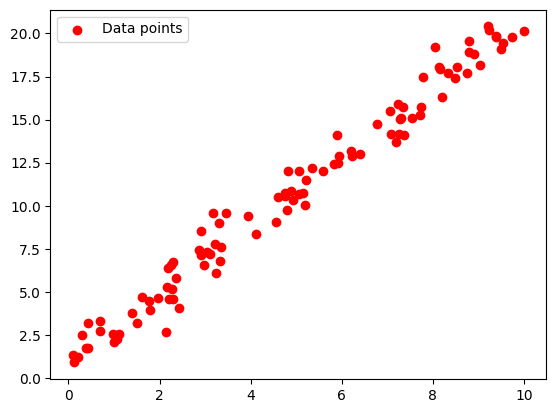

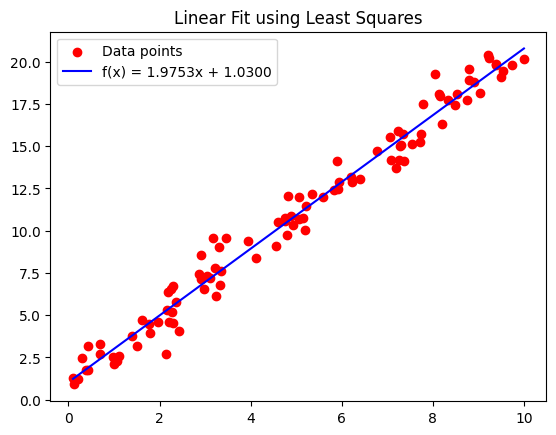

In [ ]:
import numpy as np
from scipy import polyfit
import matplotlib.pyplot as plt

# 随机生成 100 个 x 值
x = np.random.rand(100) * 10
# 生成对应的 y 值，使用线性关系 y = 2x + 1 加上噪声
y = 2 * x + 1 + np.random.randn(100)

# 使用 polyfit 进行线性拟合，1 表示线性多项式
p = polyfit(x, y, 1)

# p[0] 是斜率，p[1] 是 y 轴截距
slope = p[0]
intercept = p[1]

# 打印出参数
print(f"Slope (m): {slope}")
print(f"Intercept (b): {intercept}")

# 参数方程为 y = mx + b
# 将参数方程写出来
equation = f"f(x) = {slope:.4f}x + {intercept:.4f}"

plt.scatter(x, y, color='red', label='Data points')
plt.legend()
plt.show()

# 绘制数据点和拟合直线
plt.scatter(x, y, color='red', label='Data points')
x_fit = np.linspace(min(x), max(x), 100)
y_fit = slope * x_fit + intercept
plt.plot(x_fit, y_fit, color='blue', label=equation)

# 添加图例和标题
plt.legend()
plt.title('Linear Fit using Least Squares')
plt.show()

2. **一个非线性函数的例子**

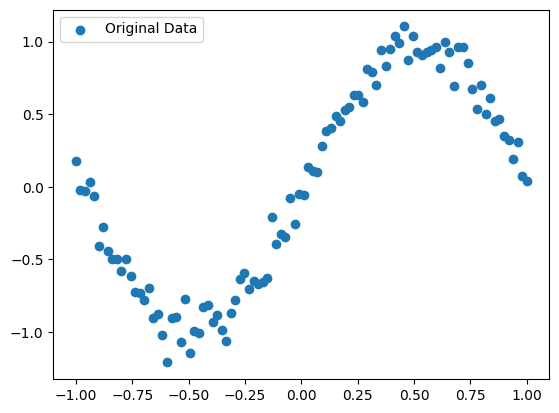

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(0)
# 生成示例数据
np.random.seed(0)
x = np.linspace(-1, 1, 100).reshape(-1, 1)
y = np.sin(np.pi * x) + np.random.normal(0, 0.1, x.shape)
plt.scatter(x, y, label='Original Data')
plt.legend()
plt.show()

**3. 采用两层 MLP 对上述非线性函数进行拟合**

Epoch [100/1000], Loss: 0.0985
Epoch [200/1000], Loss: 0.0835
Epoch [300/1000], Loss: 0.0800
Epoch [400/1000], Loss: 0.0787
Epoch [500/1000], Loss: 0.0782
Epoch [600/1000], Loss: 0.0779
Epoch [700/1000], Loss: 0.0778
Epoch [800/1000], Loss: 0.0777
Epoch [900/1000], Loss: 0.0776
Epoch [1000/1000], Loss: 0.0776


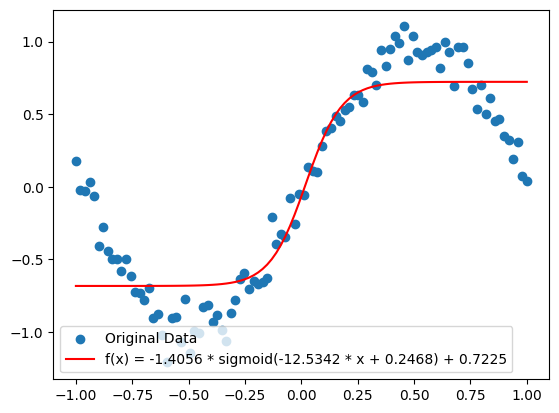

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
torch.manual_seed(0)
# 生成示例数据
np.random.seed(0)
x = np.linspace(-1, 1, 100).reshape(-1, 1)
y = np.sin(np.pi * x) + np.random.normal(0, 0.1, x.shape)

# 转换数据为PyTorch张量
x_tensor = torch.FloatTensor(x)
y_tensor = torch.FloatTensor(y)

# 定义一层MLP模型
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.hidden = nn.Linear(1, 1)  # 隐藏层
        self.output = nn.Linear(1, 1)  # 输出层
        self.sigmoid = nn.Sigmoid()  # Sigmoid激活函数

    def forward(self, x):
        x = self.sigmoid(self.hidden(x))
        x = self.output(x)
        return x

    # 自定义函数来生成函数表达式字符串
    def generate_equation(self):
        # 获取第一层和第二层的权重和偏置
        w1 = self.hidden.weight.item()
        b1 = self.hidden.bias.item()
        w2 = self.output.weight.item()
        b2 = self.output.bias.item()

        # 生成函数表达式字符串
        equation = f"f(x) = {w2:.4f} * sigmoid({w1:.4f} * x + {b1:.4f}) + {b2:.4f}"
        return equation

# 创建模型实例
model = SimpleMLP()

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)
# optimizer = optim.SGD(model.parameters(), lr=0.1)

# 训练模型
num_epochs = 1000
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)

    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 模型预测
model.eval()
predicted = model(x_tensor).detach().numpy()

# 记录最终的函数表达式
func = model.generate_equation()

# 可视化结果
plt.scatter(x, y, label='Original Data')
plt.plot(x, predicted, label=func, color='red')
plt.legend()
plt.show()


**4. 采用 KAN 对上述非线性函数进行拟合**

In [ ]:
!pip install pykan

torch.Size([100, 1])
torch.Size([100, 1])


train loss: 9.18e-02 | test loss: 9.18e-02 | reg: 3.28e-01 : 100%|██| 20/20 [00:01<00:00, 18.64it/s]


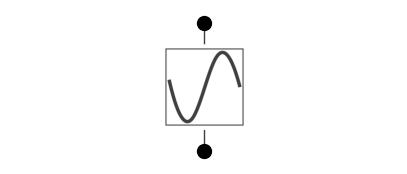

fixing (0,0,0) with sin, r2=0.9993544220924377


train loss: 9.32e-02 | test loss: 9.32e-02 | reg: 3.29e-01 : 100%|██| 10/10 [00:00<00:00, 22.53it/s]


0.01 - 0.99*sin(3.15*x_1 - 3.19)


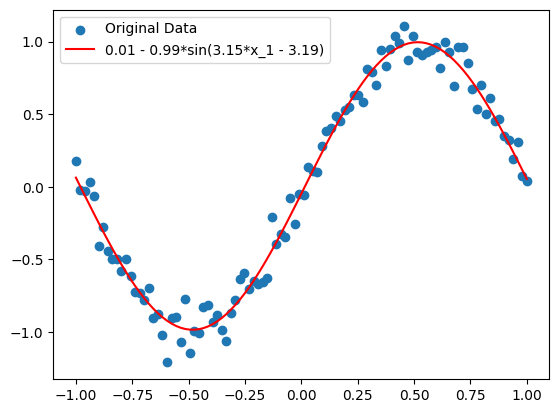

In [ ]:
from kan import *
import torch
import numpy as np

torch.manual_seed(0)
np.random.seed(0)

device = 'cpu'

# 创建数据
x = np.linspace(-1, 1, 100).reshape(-1, 1)
y = np.sin(np.pi * x) + np.random.normal(0, 0.1, x.shape)

# 转换数据为PyTorch张量
x_tensor = torch.FloatTensor(x)
y_tensor = torch.FloatTensor(y)

dataset = {}
dataset['train_input'] = x_tensor
dataset['test_input'] = x_tensor

dataset['train_label'] = y_tensor
dataset['test_label'] = y_tensor

print(dataset['train_input'].shape)
print(dataset['train_label'].shape)

# 创建一个 KAN：第一层是1个特征输入层节点（x），第二层是 1 个输出层节点 f(x, y)，k = 3 代表选择三次样条曲线，grid = 3 代表网格点为 3
model = KAN(width=[1,1], grid=3, k=3, seed=0)
model(dataset['train_input'])

# 训练模型
model.train(dataset, opt="LBFGS", steps=20)
model.plot()
plt.show()

# 自动设置符号函数然后继续训练模型
model.auto_symbolic()
model.train(dataset, opt="LBFGS", steps=10)

# 打印出最终拟合的函数
print(model.symbolic_formula()[0][0])

# 模型预测
predicted = model(x_tensor).detach().numpy()

# 可视化结果
plt.scatter(x, y, label='Original Data')
plt.plot(x, predicted, label=model.symbolic_formula()[0][0], color='red')
plt.legend()
plt.show()


**5. 常见的一元函数及其曲线图**

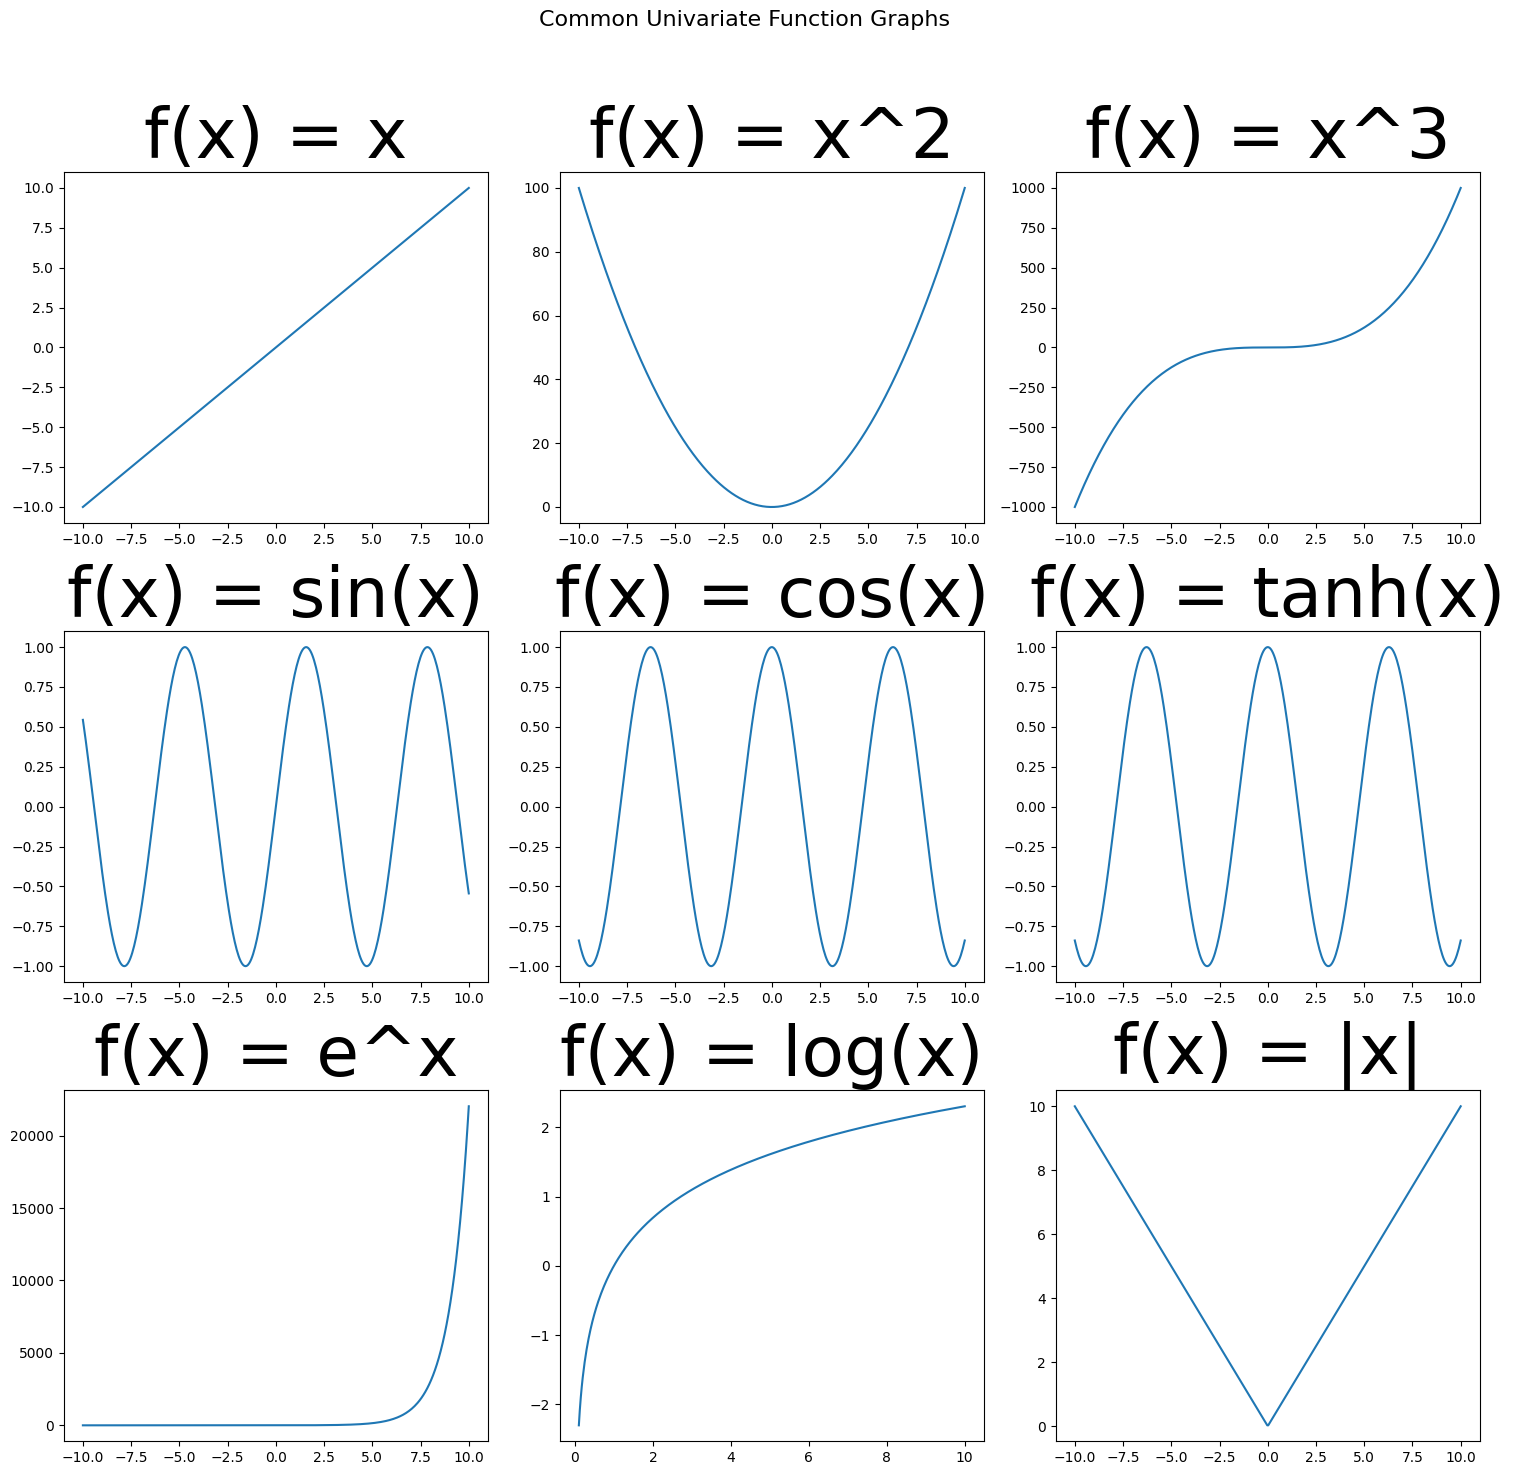

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义常见的一元函数
functions = [
    (lambda x: x, 'f(x) = x'),
    (lambda x: x**2, 'f(x) = x^2'),
    (lambda x: x**3, 'f(x) = x^3'),
    (lambda x: np.sin(x), 'f(x) = sin(x)'),
    (lambda x: np.cos(x), 'f(x) = cos(x)'),
    (lambda x: np.cos(x), 'f(x) = tanh(x)'),
    (lambda x: np.exp(x), 'f(x) = e^x'),
    (lambda x: np.log(x), 'f(x) = log(x)'),
    (lambda x: np.abs(x), 'f(x) = |x|')
]

# 设置绘图区域
x = np.linspace(-10, 10, 400)
x_log = np.linspace(0.1, 10, 400)  # 避免 log(0) 引发错误

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Common Univariate Function Graphs', fontsize=16)

# 绘制每个函数
for ax, (func, title) in zip(axs.flatten(), functions):
    if 'log' in title:
        ax.plot(x_log, func(x_log))
    else:
        ax.plot(x, func(x))
    ax.set_title(title, fontsize = 50)

# 调整子图布局
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
